<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/1/fCorrelatedSpikeTrain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating a 1/f correlated Poisson spike train can be achieved by following these steps:

Generate a 1/f noise signal.
Integrate the noise signal to get a cumulative signal.
Scale the cumulative signal to have a mean of 0 and a variance of 1.
Convert the scaled signal into a Poisson spike train.

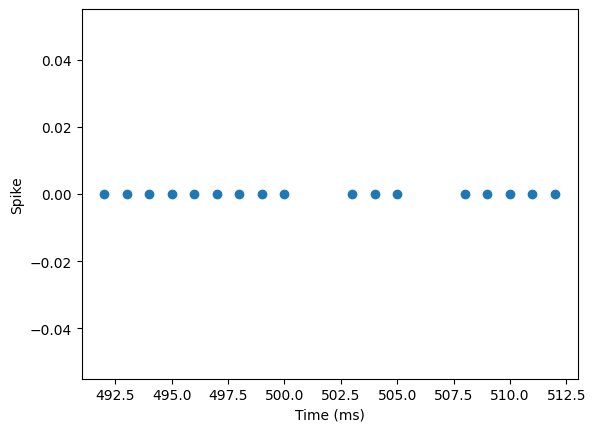

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Step 1: Generate a 1/f noise signal
fs = 1000  # sampling rate
T = 10000  # duration in milliseconds
f, Pxx = signal.welch(np.random.randn(T*fs), fs=fs, nperseg=1024)
noise = np.sqrt(Pxx) * np.exp(1j*2*np.pi*np.random.rand(len(Pxx)))
noise = np.real(np.fft.ifft(noise))

# Step 2: Integrate the noise signal
integrated = np.cumsum(noise)

# Step 3: Scale the cumulative signal
scaled = (integrated - np.mean(integrated)) / np.std(integrated)

# Step 4: Convert to a Poisson spike train
spike_train = np.zeros(len(scaled))
spike_train[scaled > 2] = 1  # set a threshold to generate spikes
spike_times = np.nonzero(spike_train)[0]

# plot the spike train
plt.plot(spike_times, np.zeros(len(spike_times)), 'o')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.show()


In this code, fs and T define the sampling rate and the duration of the spike train in milliseconds, respectively. In step 1, we generate a white noise signal and apply a Welch's method to obtain a power spectrum with a 1/f shape. We then generate a complex noise signal with this power spectrum and take the real part to obtain the 1/f noise signal.

In step 2, we integrate the noise signal to obtain a cumulative signal. In step 3, we scale the cumulative signal to have a mean of 0 and a variance of 1.

In step 4, we convert the scaled signal into a Poisson spike train by setting a threshold to generate spikes. The threshold value of 2 can be adjusted to control the spiking rate. Finally, we obtain the spike times by finding the non-zero elements of the spike train array and plot the spike train.